#Computational Intelligence Assignment 2
By Ahmad Hamdan

##Problem Formulation: 
Assume that you have a walking robot standing on 4 feet. We model the robot as a point-mass with four reaction forces acting on it:
$$
m\ddot{r}_c=f_1+f_2+f_3+f_4+mg\\
0=\sum_{i=1}^{4}(r_i-r_c)\times f_i
$$
where $r_C \in \mathbb{R}^3 $ is the position of the center of mass of the robot, $f_i \in \mathbb{R}^3 $ are the reaction forces, $r_i \in \mathbb{R}^3 $ are the positions of the feet, $m$ is the mass of the robot and $ g =
\begin{bmatrix}
0 \\ 0\\-9.8
\end{bmatrix} $ is the gravitational vector. 

We additionally assume that the reaction forces lie in the friction cone, with friction coefficient $\mu$

#Task 1
Given $r_C$, and $r_i$ find if there exist reaction forces that allow the robot to maintain static stability with $\ddot{r_c} = 0$, given that the robot stands on horizontal ground. <br> <br>

---
The robot is standing on a horizontal plane, therefore all contact point with the floor are on a horizontal plane. The normal vector $n = \begin{bmatrix}
0 \\ 0\\ 1
\end{bmatrix} $ and we find a basis for the mentioned floor using the left null space. And we find it to be $
e=
\begin{bmatrix}
0 &-1\\ 1&0\\0&0
\end{bmatrix}
$ 

The position of the center is calcuated as the average of all feet positions $r_i $, which are caclculated as linear combinations of the basis vectors.

We express the cross product $(r_i-r_c)\times f_i$ by the following skew_symetric matrix 

$$
R_{i}=
\begin{bmatrix}
0 & -(r_{iz}-r_{cz}) & (r_{iy}-r_{cy})\\
(r_{iz}-r_{cz}) & 0& -(r_{ix}-r_{cx})\\
-(r_{iy}-r_{cy})& (r_{ix}-r_{cx}) &0
\end{bmatrix}
$$

We can describe the system in matrix form: 
$$
\begin{bmatrix}
I & I & I & I\\
R_{1} & R_{2} & R_{3} & R_{4}
\end{bmatrix}
\begin{bmatrix}
f_1 \\ f_2 \\f_3\\f_4
\end{bmatrix}=
\begin{bmatrix}
-mg\\0
\end{bmatrix}
$$

###Optimization Problem: 
$$
\begin{equation}
\begin{aligned}
\min_{f_i, i=1,..,4} \quad & \sum_{i=1}^{4}||f_i||\\
\textrm{s.t.} \quad & Af =b\\ 
 & ||e^Tf_i|| ≤ µn^Tf_i \\
&  i=1,2,3,4
\end{aligned}
\end{equation}
$$


Normal =  
 [[0]
 [0]
 [1]]


Basis =  
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


r_1 = [-0.90563916  0.63925929  0.        ]
r_2 = [-0.81849234  0.40608851  0.        ]
r_3 = [-0.08613566  0.0787065   0.        ]
r_4 = [-0.29295759  0.78453538  0.        ]
r_c = [-0.52580619  0.47714742  0.25      ]




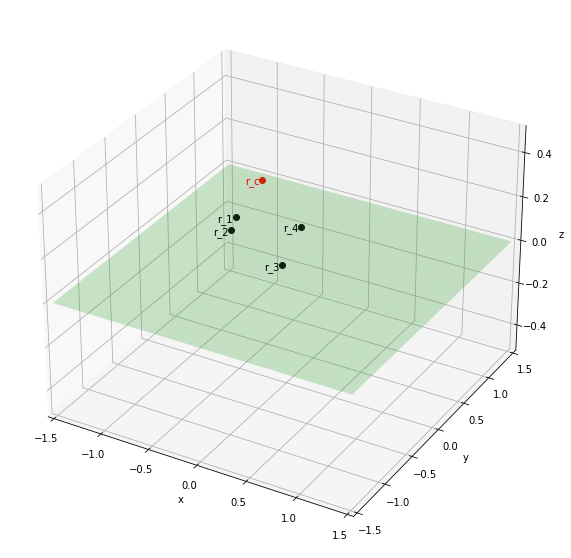



Reaction forces are: 

	 	 f_1 = [[-2.61751592e-24  3.12176528e-24  4.90000000e+02]]
	 	 f_2 = [[-1.94208398e-24  3.37421824e-24  4.90000000e+02]]
	 	 f_3 = [[-9.93757485e-25  3.65098239e-24  4.90000000e+02]]
	 	 f_4 = [[1.50433491e-24 4.89651672e-24 4.90000000e+02]]


In [79]:
import numpy as np
import cvxpy as cp
from scipy.linalg import null_space, orth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def skew_sym(a, b):
  c = a - b
  r = np.array([[0,-c[2],c[1]],
           [c[2],0,-c[0]],
           [-c[1],c[0],0]])
  return r

n=np.array([[0,0,1]]).T
print("Normal =  \n", n, end='\n\n\n')
basis = null_space(n.T)
print("Basis =  \n", basis, end='\n\n\n')

# Generate ri as linear combinations of the basis vectors
r = []
for i in range(1,5):
  a , b = np.random.random_sample(),  np.random.random_sample()
  x = a*basis[:,0] + b*basis[:,1]
  r.append(x)
  print(f'r_{i} = {x}')


#calcuate rc as the average with hight 0.25 m
r_c= (r[0]+r[1]+r[2]+r[3])/4 + np.array([0, 0, 0.25])
print("r_c =",r_c, end='\n\n\n')

#------------------------------------------------------------------------
#plotting
v1 = basis[:,0]
w1 = basis[:,1]
p1 = np.array([[0, 0, 0]])

normal1 = null_space(np.vstack([v1, w1]))

fig = plt.figure(figsize=(10,10))

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-0.5, 0.5)
    return ax

ax = setup_3d_axes()

plan_origin_1 = p1.T
x1_0,y1_0,z1_0=p1.T

# compute the plane orthogonal to basis
x1, y1 = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-1.5, 1.5, 61))
A1, B1, C1 = normal1
z1 = (-A1 * (x1-x1_0) - B1 * (y1-y1_0)) / C1+z1_0

# cut off the plane below z=0 (just to make the plot nicer)
mask1 = np.where(z1 >= 0)
x1 = x1[mask1]
y1 = y1[mask1]
z1 = z1[mask1]


mask2 = np.where(z1 <= 5)
x1 = x1[mask2]
y1 = y1[mask2]
z1 = z1[mask2]

ax.plot_trisurf(x1, y1, z1, color='C2', shade=False, alpha=0.25)


ax.plot(*r[0], color='k', marker='o')
ax.plot(*r[1], color='k', marker='o')
ax.plot(*r[2], color='k', marker='o')
ax.plot(*r[3], color='k', marker='o')
ax.plot(*r_c, color='r', marker='o')

offset = np.full((3, 1), -0.02)

ax.text(*(r_c + offset)[0],
        'r_c',
        color='r', horizontalalignment='right')

ax.text(*(r[0] + offset)[0],
        'r_1',
        color='k', horizontalalignment='right')
ax.text(*(r[1] + offset)[0],
        'r_2',
        color='k', horizontalalignment='right')
ax.text(*(r[2] + offset)[0],
        'r_3',
        color='k', horizontalalignment='right')
ax.text(*(r[3] + offset)[0],
        'r_4',
        color='k', horizontalalignment='right')


plt.show()
#-------------------------------------------------------------

#Find skew_sym matrices
R = []

for i in range(4):
  m = skew_sym(r[i], r_c)
  R.append(m)


#-----------------------------------------------------------------
#solving optimization problem
m= 200 
g= -9.8 
mu= 0.5

# formulating the matrices as explained in the theoretical part
I=np.concatenate((np.eye(3),np.eye(3),np.eye(3),np.eye(3)), axis=1)
Rs=np.concatenate((R[0],R[1],R[2],R[3]), axis=1)

A=np.concatenate((I,Rs),axis=0)
b=np.array([[0,0,-g*m,0,0,0]]).T

# reaction forces 
f=cp.Variable((12,1))

# objective function
obj = cp.Minimize(cp.norm(f[0:3])+cp.norm(f[3:6])+cp.norm(f[6:9])+cp.norm(f[9:12]))

# constraints
constraints = [ A@f== b,
               cp.norm(basis.T@f[0:3])<=mu*n.T@f[0:3],
               cp.norm(basis.T@f[3:6])<=mu*n.T@f[3:6],
               cp.norm(basis.T@f[6:9])<=mu*n.T@f[6:9],
               cp.norm(basis.T@f[9:12])<=mu*n.T@f[9:12]]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print('\n\nReaction forces are: \n')
if result != None:
  for i in range(0, 4):
    print(f'\t \t f_{i+1} = {f.value[3*i:3*i+3].T}' )



#Task 2
Solve the previous problem, but assume that the robot stands on tilted ground.



---


I assumed that the ground is tilted with 9 degrees incline. In order to solve the new problem we just need to calculate the new norm and find the new basis then generate new random points and solve the problem exactly as we did in the previouse task.

Normal =  
 [[0.15643447]
 [0.        ]
 [0.98768834]]


Basis =  
 [[ 0.         -0.98768834]
 [ 1.          0.        ]
 [ 0.          0.15643447]]


r_1 = [-0.83875842  0.81003886  0.13284628]
r_2 = [-0.733517    0.94645481  0.11617768]
r_3 = [-0.09379241  0.9495383   0.01485526]
r_4 = [-0.49326422  0.64735413  0.07812538]
r_c = [-0.5007244   0.83834653  0.33242323]




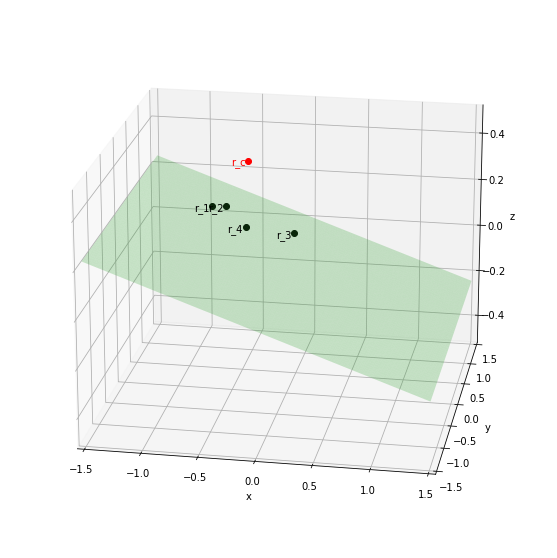



Reaction forces are: 

	 	 f_1 = [[-2.05482346e-03  4.58627145e-04  4.25940854e+02]]
	 	 f_2 = [[ 1.39688530e-04 -1.02369290e-04  4.25901597e+02]]
	 	 f_3 = [[4.64487172e-03 3.11650963e-03 5.87930824e+02]]
	 	 f_4 = [[-2.72973679e-03 -3.47276748e-03  5.20226725e+02]]


In [75]:
#function to rotate around y axis using rotation matrix
def Rot_y(theta, v):
  c=np.cos
  s=np.sin
  Rot=np.array([[c(theta),0,s(theta)],
                [0,1,0],
                [-s(theta),0,c(theta)]])

  u = Rot@v
  return u


theta = np.pi/20
n=np.array([[0,0,1]]).T
n = Rot_y(theta, n)
print("Normal =  \n", n, end='\n\n\n')
basis = null_space(n.T)
print("Basis =  \n", basis, end='\n\n\n')

# Generate ri as linear combinations of the basis vectors
r = []
for i in range(1,5):
  a , b = np.random.random_sample(),  np.random.random_sample()
  x = a*basis[:,0] + b*basis[:,1]
  r.append(x)
  print(f'r_{i} = {x}')


#calcuate rc as the average with height 0.25 m
r_c= (r[0]+r[1]+r[2]+r[3])/4 + Rot_y(theta, np.array([0,0,0.25]))
print("r_c =",r_c, end='\n\n\n')

#------------------------------------------------------------------------
#plotting
v1 = basis[:,0]
w1 = basis[:,1]
p1 = np.array([[0, 0, 0]])

normal1 = null_space(np.vstack([v1, w1]))

fig = plt.figure(figsize=(10,10))

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-80, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-0.5, 0.5)
    return ax

ax = setup_3d_axes()

plan_origin_1 = p1.T
x1_0,y1_0,z1_0=p1.T

# compute the plane orthogonal to basis
x1, y1 = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-1.5, 1.5, 61))
A1, B1, C1 = normal1
z1 = (-A1 * (x1-x1_0) - B1 * (y1-y1_0)) / C1+z1_0

# cut off the plane below z=-5 (just to make the plot nicer)
mask1 = np.where(z1 >= -5)
x1 = x1[mask1]
y1 = y1[mask1]
z1 = z1[mask1]


mask2 = np.where(z1 <= 5)
x1 = x1[mask2]
y1 = y1[mask2]
z1 = z1[mask2]

ax.plot_trisurf(x1, y1, z1, color='C2', shade=False, alpha=0.25)


ax.plot(*r[0], color='k', marker='o')
ax.plot(*r[1], color='k', marker='o')
ax.plot(*r[2], color='k', marker='o')
ax.plot(*r[3], color='k', marker='o')
ax.plot(*r_c, color='r', marker='o')

offset = np.full((3, 1), -0.02)

ax.text(*(r_c + offset)[0],
        'r_c',
        color='r', horizontalalignment='right')

ax.text(*(r[0] + offset)[0],
        'r_1',
        color='k', horizontalalignment='right')
ax.text(*(r[1] + offset)[0],
        'r_2',
        color='k', horizontalalignment='right')
ax.text(*(r[2] + offset)[0],
        'r_3',
        color='k', horizontalalignment='right')
ax.text(*(r[3] + offset)[0],
        'r_4',
        color='k', horizontalalignment='right')


plt.show()
#-------------------------------------------------------------

#Find skew_sym matrices
R = []

for i in range(4):
  m = skew_sym(r[i], r_c)
  R.append(m)


#-----------------------------------------------------------------
#solving optimization problem
m= 200 
g= -9.8 
mu= 0.5

# formulating the matrices as explained in the theoretical part
I=np.concatenate((np.eye(3),np.eye(3),np.eye(3),np.eye(3)), axis=1)
Rs=np.concatenate((R[0],R[1],R[2],R[3]), axis=1)

A=np.concatenate((I,Rs),axis=0)
b=np.array([[0,0,-g*m,0,0,0]]).T

# reaction forces 
f=cp.Variable((12,1))

# objective function
obj = cp.Minimize(cp.norm(f[0:3])+cp.norm(f[3:6])+cp.norm(f[6:9])+cp.norm(f[9:12]))

# constraints
constraints = [ A@f== b,
               cp.norm(basis.T@f[0:3])<=mu*n.T@f[0:3],
               cp.norm(basis.T@f[3:6])<=mu*n.T@f[3:6],
               cp.norm(basis.T@f[6:9])<=mu*n.T@f[6:9],
               cp.norm(basis.T@f[9:12])<=mu*n.T@f[9:12]]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print('\n\nReaction forces are: \n')
if result != None:
  for i in range(0, 4):
    print(f'\t \t f_{i+1} = {f.value[3*i:3*i+3].T}' )

#Task 3
Solve the previous problem, but assume that one of the feet pushes against a vertical wall instead of standing on the ground.

---
We assume the 4th leg is pushing against the vertical wall, and becuase it is a vertical wall we know the norm and we can find the basis using the left null space as we did in in the first task. therefore we arrive to the following optimization problem.

$$
\begin{equation}
\begin{aligned}
\min_{f_i, i=1,..,4} \quad & \sum_{i=1}^{4}||f_i||\\
\textrm{s.t.} \quad & Af =b\\ 
 & ||e^Tf_i|| ≤ µn^Tf_i \\
&  i=1,2,3 \\
& ||e_2^Tf_4|| ≤ µn_2^Tf_4
\end{aligned}
\end{equation}
$$

As a simple explanation for the example I provided in this task, we can see that the first and the third leg are doing the most work holding the weight of the robot, while the second leg is not doing much and the fourth leg which is holding the weight against the wall is doing some work as well. 

Normal 1 =  
 [[0.15643447]
 [0.        ]
 [0.98768834]]


Basis 1 =  
 [[ 0.         -0.98768834]
 [ 1.          0.        ]
 [ 0.          0.15643447]]


Normal 2 =  
 [[1]
 [0]
 [0]]


Basis 2 =  
 [[0. 0.]
 [1. 0.]
 [0. 1.]]


r_1 = [-0.09876883  0.5         0.01564345]
r_2 = [-0.98768834  0.5         0.15643447]
r_3 = [-0.98768834 -1.          0.15643447]
r_4 = [ 0.  -0.7  0.2]
r_c = [-0.47942776 -0.175       0.37905018]




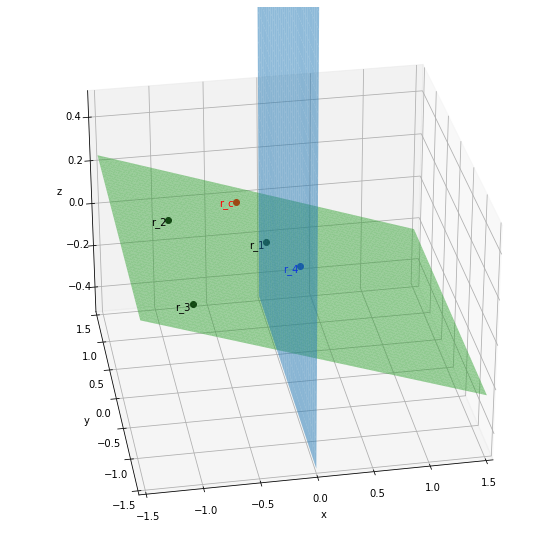



Reation forces are: 

	 	 f_1 = [[ -31.86925967  -20.94099957 1068.87435366]]
	 	 f_2 = [[-3.20252458e-08  2.12948608e-09 -2.21242301e-07]]
	 	 f_3 = [[-80.78422734  16.27655293 834.99236784]]
	 	 f_4 = [[112.65348705   4.66444664  56.13327873]]


In [76]:
theta = np.pi/20
n=np.array([[0,0,1]]).T
n = Rot_y(theta, n)

n2 = np.array([[1,0,0]]).T
print("Normal 1 =  \n", n, end='\n\n\n')
basis = null_space(n.T)
print("Basis 1 =  \n", basis, end='\n\n\n')

print("Normal 2 =  \n", n2, end='\n\n\n')
basis2 = null_space(n2.T)
print("Basis 2 =  \n", basis2, end='\n\n\n')

# Generate ri as linear combinations of the basis vectors
r = []

r.append(+0.5*basis[:,0] + 0.1*basis[:,1])
r.append(+0.5*basis[:,0] + 1*basis[:,1])
r.append(-1*basis[:,0] + 1*basis[:,1])
r.append(-0.7*basis2[:,0] + 0.2*basis2[:,1])

for i in range(4):
  print(f'r_{i+1} = {r[i]}')

#calcuate rc as the average with hight 0.25 m
r_c= (r[0]+r[1]+r[2]+r[3])/4 + Rot_y(theta, np.array([0,0,0.25]))
print("r_c =",r_c, end='\n\n\n')

#------------------------------------------------------------------------
#plotting
v1 = basis[:,0]
w1 = basis[:,1]
p1 = np.array([[0, 0, 0]])

normal1 = null_space(np.vstack([v1, w1]))

fig = plt.figure(figsize=(10,10))

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-100, elev=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-0.5, 0.5)
    return ax

ax = setup_3d_axes()

plan_origin_1 = p1.T
x1_0,y1_0,z1_0=p1.T

# compute the plane orthogonal to basis
x1, y1 = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-1.5, 1.5, 61))
A1, B1, C1 = normal1
z1 = (-A1 * (x1-x1_0) - B1 * (y1-y1_0)) / C1+z1_0

# cut off the plane below z=0 (just to make the plot nicer)
mask1 = np.where(z1 >= -5)
x1 = x1[mask1]
y1 = y1[mask1]
z1 = z1[mask1]


mask2 = np.where(z1 <= 5)
x1 = x1[mask2]
y1 = y1[mask2]
z1 = z1[mask2]

ax.plot_trisurf(x1, y1, z1, color='C2', shade=False, alpha=0.5)


ax.plot(*r[0], color='k', marker='o')
ax.plot(*r[1], color='k', marker='o')
ax.plot(*r[2], color='k', marker='o')
ax.plot(*r[3], color='b', marker='o')
ax.plot(*r_c, color='r', marker='o')

offset = np.full((3, 1), -0.02)

ax.text(*(r_c + offset)[0],
        'r_c',
        color='r', horizontalalignment='right')

ax.text(*(r[0] + offset)[0],
        'r_1',
        color='k', horizontalalignment='right')
ax.text(*(r[1] + offset)[0],
        'r_2',
        color='k', horizontalalignment='right')
ax.text(*(r[2] + offset)[0],
        'r_3',
        color='k', horizontalalignment='right')
ax.text(*(r[3] + offset)[0],
        'r_4',
        color='b', horizontalalignment='right')
yy, zz = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-0.5, 1.5, 61))
xx = yy*0
ax.plot_surface(xx, yy, zz, color='C0', shade=False, alpha=0.5)

plt.show()
#-------------------------------------------------------------

#Find skew_sym matrices
R = []

for i in range(4):
  m = skew_sym(r[i], r_c)
  R.append(m)


#-----------------------------------------------------------------
#solving optimization problem
m= 200
g= -9.8 
mu= 0.5

# formulating the matrices as explained in the theoretical part
I=np.concatenate((np.eye(3),np.eye(3),np.eye(3),np.eye(3)), axis=1)
Rs=np.concatenate((R[0],R[1],R[2],R[3]), axis=1)

A=np.concatenate((I,Rs),axis=0)
b=np.array([[0,0,-g*m,0,0,0]]).T

# reaction forces 
f=cp.Variable((12,1))

# objective function
obj = cp.Minimize(cp.norm(f[0:3])+cp.norm(f[3:6])+cp.norm(f[6:9])+cp.norm(f[9:12]))

# constraints
constraints = [ A@f== b,
               cp.norm(basis.T@f[0:3])<=mu*n.T@f[0:3],
               cp.norm(basis.T@f[3:6])<=mu*n.T@f[3:6],
               cp.norm(basis.T@f[6:9])<=mu*n.T@f[6:9],
               cp.norm(basis2.T@f[9:12])<=mu*n2.T@f[9:12]]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print('\n\nReation forces are: \n')
if result != None:
  for i in range(0, 4):
    print(f'\t \t f_{i+1} = {f.value[3*i:3*i+3].T}' )

#Task 4

Solve the previous problem, but assume that one of the feet is nailed to the floor.

---
We will use the same scenario in the previouse task, and we will assume that the first leg is nailed to the ground. 

This change reduces the number of constraints in our optimization problem is if the friction is infinite and we do not need to consider it as a constraint. Therefore the optimization problem is introduced as follows

$$
\begin{equation}
\begin{aligned}
\min_{f_i, i=1,..,4} \quad & \sum_{i=1}^{4}||f_i||\\
\textrm{s.t.} \quad & Af =b\\ 
 & ||e^Tf_i|| ≤ µn^Tf_i \\
&  i= 2,3 \\
& ||e_2^Tf_4|| ≤ µn_2^Tf_4
\end{aligned}
\end{equation}
$$


Normal 1 =  
 [[0.15643447]
 [0.        ]
 [0.98768834]]


Basis 1 =  
 [[ 0.         -0.98768834]
 [ 1.          0.        ]
 [ 0.          0.15643447]]


Normal 2 =  
 [[1]
 [0]
 [0]]


Basis 2 =  
 [[0. 0.]
 [1. 0.]
 [0. 1.]]


r_1 = [-0.09876883  0.5         0.01564345]
r_2 = [-0.98768834  0.5         0.15643447]
r_3 = [-0.98768834 -1.          0.15643447]
r_4 = [ 0.  -0.7  0.2]
r_c = [-0.47942776 -0.175       0.37905018]




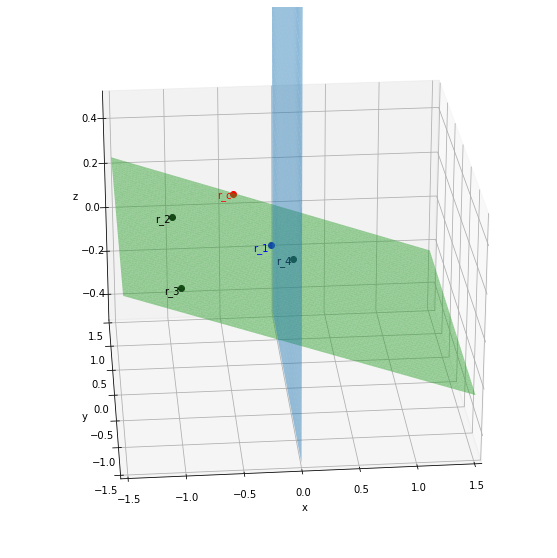



Reaction forces are: 

	 	 f_1 = [[ -31.87101586  -20.94451512 1068.87471256]]
	 	 f_2 = [[-4.78155618e-08 -7.48567439e-09 -1.90115481e-07]]
	 	 f_3 = [[-80.78239841  16.27959372 834.99208478]]
	 	 f_4 = [[112.65341432   4.66492141  56.13320284]]


In [77]:
theta = np.pi/20
n=np.array([[0,0,1]]).T
n = Rot_y(theta, n)

n2 = np.array([[1,0,0]]).T
print("Normal 1 =  \n", n, end='\n\n\n')
basis = null_space(n.T)
print("Basis 1 =  \n", basis, end='\n\n\n')

print("Normal 2 =  \n", n2, end='\n\n\n')
basis2 = null_space(n2.T)
print("Basis 2 =  \n", basis2, end='\n\n\n')

# Generate ri as linear combinations of the basis vectors
r = []

r.append(+0.5*basis[:,0] + 0.1*basis[:,1])
r.append(+0.5*basis[:,0] + 1*basis[:,1])
r.append(-1*basis[:,0] + 1*basis[:,1])
r.append(-0.7*basis2[:,0] + 0.2*basis2[:,1])
for i in range(4):
  print(f'r_{i+1} = {r[i]}')

#calcuate rc as the average with hight 0.25 m
r_c= (r[0]+r[1]+r[2]+r[3])/4 + Rot_y(theta, np.array([0,0,0.25]))
print("r_c =",r_c, end='\n\n\n')

#------------------------------------------------------------------------
#plotting
v1 = basis[:,0]
w1 = basis[:,1]
p1 = np.array([[0, 0, 0]])

normal1 = null_space(np.vstack([v1, w1]))

fig = plt.figure(figsize=(10,10))

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-95, elev=25)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-0.5, 0.5)
    return ax

ax = setup_3d_axes()

plan_origin_1 = p1.T
x1_0,y1_0,z1_0=p1.T

# compute the plane orthogonal to basis
x1, y1 = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-1.5, 1.5, 61))
A1, B1, C1 = normal1
z1 = (-A1 * (x1-x1_0) - B1 * (y1-y1_0)) / C1+z1_0

# cut off the plane below z=0 (just to make the plot nicer)
mask1 = np.where(z1 >= -5)
x1 = x1[mask1]
y1 = y1[mask1]
z1 = z1[mask1]


mask2 = np.where(z1 <= 5)
x1 = x1[mask2]
y1 = y1[mask2]
z1 = z1[mask2]

ax.plot_trisurf(x1, y1, z1, color='C2', shade=False, alpha=0.5)


ax.plot(*r[0], color='b', marker='o')
ax.plot(*r[1], color='k', marker='o')
ax.plot(*r[2], color='k', marker='o')
ax.plot(*r[3], color='k', marker='o')
ax.plot(*r_c, color='r', marker='o')

offset = np.full((3, 1), -0.02)

ax.text(*(r_c + offset)[0],
        'r_c',
        color='r', horizontalalignment='right')

ax.text(*(r[0] + offset)[0],
        'r_1',
        color='b', horizontalalignment='right')
ax.text(*(r[1] + offset)[0],
        'r_2',
        color='k', horizontalalignment='right')
ax.text(*(r[2] + offset)[0],
        'r_3',
        color='k', horizontalalignment='right')
ax.text(*(r[3] + offset)[0],
        'r_4',
        color='k', horizontalalignment='right')
yy, zz = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-0.5, 1.5, 61))
xx = yy*0
ax.plot_surface(xx, yy, zz, color='C0', shade=False, alpha=0.5)

plt.show()
#-------------------------------------------------------------

#Find skew_sym matrices
R = []

for i in range(4):
  m = skew_sym(r[i], r_c)
  R.append(m)


#-----------------------------------------------------------------
#solving optimization problem
m= 200
g= -9.8 
mu= 0.5

# formulating the matrices as explained in the theoretical part
I=np.concatenate((np.eye(3),np.eye(3),np.eye(3),np.eye(3)), axis=1)
Rs=np.concatenate((R[0],R[1],R[2],R[3]), axis=1)

A=np.concatenate((I,Rs),axis=0)
b=np.array([[0,0,-g*m,0,0,0]]).T

# reaction forces 
f=cp.Variable((12,1))

# objective function
obj = cp.Minimize(cp.norm(f[0:3])+cp.norm(f[3:6])+cp.norm(f[6:9])+cp.norm(f[9:12]))

# constraints
constraints = [ A@f== b,
               #removed leg 1 from the constraints
               cp.norm(basis.T@f[3:6])<=mu*n.T@f[3:6],
               cp.norm(basis.T@f[6:9])<=mu*n.T@f[6:9],
               cp.norm(basis2.T@f[9:12])<=mu*n2.T@f[9:12]]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print('\n\nReaction forces are: \n')
if result != None:
  for i in range(0, 4):
    print(f'\t \t f_{i+1} = {f.value[3*i:3*i+3].T}' )

#Task 5
Assume a constant external force $\mathrm{f}_{\mathrm{e}}$ acts on the robot, $\left\|\mathbf{M f}_{\mathrm{e}}+\mathrm{f}_{\mathrm{e}, 0}\right\| \leq 1$, where $\mathbf{M}$ is positive definite matrix,
can you guarantee that the robot will remain stable?

---
The new system can be described as follows: 
$$
\begin{bmatrix}
I & I & I & I & I\\
R_1 & R_2 & R_3 & R_4 & R_e
\end{bmatrix}
\begin{bmatrix}
f_1 \\ f_2 \\f_3\\f_4 \\f_e
\end{bmatrix}=
\begin{bmatrix}
-mg\\0
\end{bmatrix}
$$

Therefore the new optimization problem is: 
$$
\begin{equation}
\begin{aligned}
\min_{f_e, f_i, i=1,..,4} \quad & \sum_{i=1}^{4}||f_i||\\
\textrm{s.t.} \quad & Af =b\\ 
 & ||e^Tf_i|| ≤ µn^Tf_i \\
&  i=1,2,3,4\\
& ∥Mf_e +f_{e,0}∥ ≤ 1
\end{aligned}
\end{equation}
$$


Normal =  
 [[0]
 [0]
 [1]]


Basis =  
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


r_1 = [-0.1  0.5  0. ]
r_2 = [-1.   0.5  0. ]
r_3 = [-1. -1.  0.]
r_4 = [-0.2 -0.7  0. ]
r_c = [-0.575 -0.175  0.25 ]




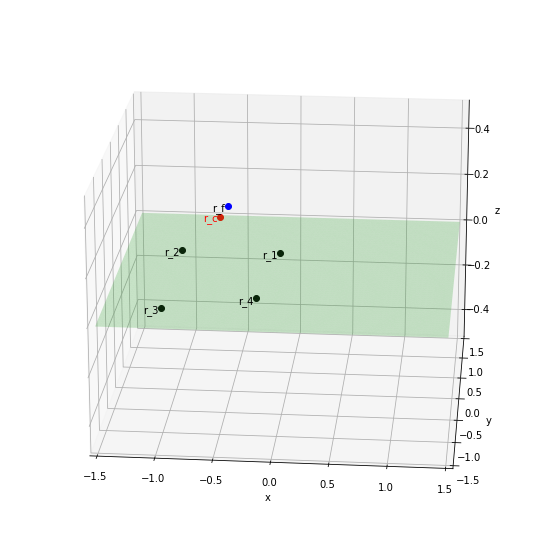



Reaction forces are: 

	 	 f_1 = [[2.23761198e-03 2.68243425e-03 4.89835222e+02]]
	 	 f_2 = [[2.24129037e-03 2.33529401e-03 4.89894785e+02]]
	 	 f_3 = [[2.81801027e-03 2.33544584e-03 4.89875610e+02]]
	 	 f_4 = [[2.70013140e-03 2.64384653e-03 4.89827033e+02]]
	 	 f_5 = [[-0.00999704 -0.00999702  0.56735023]]


In [78]:
import numpy as np
import cvxpy as cp
from scipy.linalg import null_space, orth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

n=np.array([[0,0,1]]).T
print("Normal =  \n", n, end='\n\n\n')
basis = null_space(n.T)
print("Basis =  \n", basis, end='\n\n\n')

# Generate ri as linear combinations of the basis vectors
r = []

r.append(+0.5*basis[:,0] + 0.1*basis[:,1])
r.append(+0.5*basis[:,0] + 1*basis[:,1])
r.append(-1*basis[:,0] + 1*basis[:,1])
r.append(-0.7*basis[:,0] + 0.2*basis[:,1])
for i in range(4):
  print(f'r_{i+1} = {r[i]}')


#calcuate rc as the average with hight 0.25 m
r_c= (r[0]+r[1]+r[2]+r[3])/4 + np.array([0, 0, 0.25])
print("r_c =",r_c, end='\n\n\n')

#Assume the external forces is applied close to the center of the robot 
r_f = np.array([-0.5, -0.2,  0.3 ])

#------------------------------------------------------------------------
#plotting
v1 = basis[:,0]
w1 = basis[:,1]
p1 = np.array([[0, 0, 0]])

normal1 = null_space(np.vstack([v1, w1]))

fig = plt.figure(figsize=(10,10))

def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-85, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-0.5, 0.5)
    return ax

ax = setup_3d_axes()

plan_origin_1 = p1.T
x1_0,y1_0,z1_0=p1.T

# compute the plane orthogonal to basis
x1, y1 = np.meshgrid(np.linspace(-1.5, 1.5, 61), np.linspace(-1.5, 1.5, 61))
A1, B1, C1 = normal1
z1 = (-A1 * (x1-x1_0) - B1 * (y1-y1_0)) / C1+z1_0

# cut off the plane below z=0 (just to make the plot nicer)
mask1 = np.where(z1 >= 0)
x1 = x1[mask1]
y1 = y1[mask1]
z1 = z1[mask1]


mask2 = np.where(z1 <= 5)
x1 = x1[mask2]
y1 = y1[mask2]
z1 = z1[mask2]

ax.plot_trisurf(x1, y1, z1, color='C2', shade=False, alpha=0.25)


ax.plot(*r[0], color='k', marker='o')
ax.plot(*r[1], color='k', marker='o')
ax.plot(*r[2], color='k', marker='o')
ax.plot(*r[3], color='k', marker='o')
ax.plot(*r_c, color='r', marker='o')
ax.plot(*r_f, color='b', marker='o')

offset = np.full((3, 1), -0.02)

ax.text(*(r_c + offset)[0],
        'r_c',
        color='r', horizontalalignment='right')

ax.text(*(r[0] + offset)[0],
        'r_1',
        color='k', horizontalalignment='right')
ax.text(*(r[1] + offset)[0],
        'r_2',
        color='k', horizontalalignment='right')
ax.text(*(r[2] + offset)[0],
        'r_3',
        color='k', horizontalalignment='right')
ax.text(*(r[3] + offset)[0],
        'r_4',
        color='k', horizontalalignment='right')
ax.text(*(r_f + offset)[0],
        'r_f',
        color='k', horizontalalignment='right')


plt.show()
#-------------------------------------------------------------

#Find skew_sym matrices
R = []

for i in range(4):
  m = skew_sym(r[i], r_c)
  R.append(m)
R.append(skew_sym(r_f, r_c))


#-----------------------------------------------------------------
#solving optimization problem
m= 200 
g= -9.8 
mu= 0.5

# formulating the matrices as explained in the theoretical part
I=np.concatenate((np.eye(3),np.eye(3),np.eye(3),np.eye(3), np.eye(3)), axis=1)
Rs=np.concatenate((R[0],R[1],R[2],R[3], R[4]), axis=1)

A=np.concatenate((I,Rs),axis=0)
b=np.array([[0,0,-g*m,0,0,0]]).T


fe0=np.array([[0.01,0.01,0.01]])


# reaction forces 
f=cp.Variable((15,1))

# objective function
obj = cp.Minimize(cp.norm(f[0:3])+cp.norm(f[3:6])+cp.norm(f[6:9])+cp.norm(f[9:12]))

# constraints
constraints = [ A@f== b,
               cp.norm(basis.T@f[0:3]) <= mu*n.T@f[0:3],
               cp.norm(basis.T@f[3:6]) <= mu*n.T@f[3:6],
               cp.norm(basis.T@f[6:9]) <= mu*n.T@f[6:9],
               cp.norm(basis.T@f[9:12]) <= mu*n.T@f[9:12],
               cp.norm(np.eye(3)@f[12:15]+ fe0) <= 1]

prob = cp.Problem(obj, constraints)
result = prob.solve()
print('\n\nReaction forces are: \n')
if result != None:
  for i in range(0, 5):
    print(f'\t \t f_{i+1} = {f.value[3*i:3*i+3].T}' )

